<a href="https://www.kaggle.com/code/ismailelyan/used-car-prices-best-predictions?scriptVersionId=198808161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Used Car Prices
Our project aims to predict the prices of the used cars using regression

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder , MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
train_d = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
test_d = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
train_d.shape , test_d.shape

((188533, 13), (125690, 12))

In [4]:
train_d.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
test_d.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [6]:
train_d.info() , test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ---

(None, None)

## Step 1: Clean Data

In [7]:
nulls = train_d.isna().sum()
nulls[nulls>0]

fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

<Axes: >

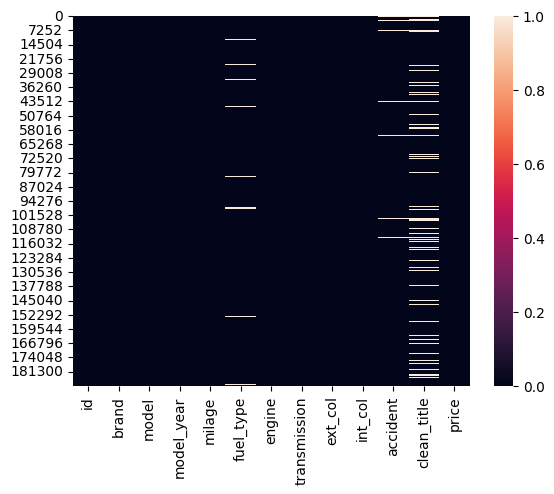

In [8]:
sns.heatmap(train_d.isna())

In [9]:
nulls2 = test_d.isna().sum()
nulls2[nulls2>0]

fuel_type       3383
accident        1632
clean_title    14239
dtype: int64

<Axes: >

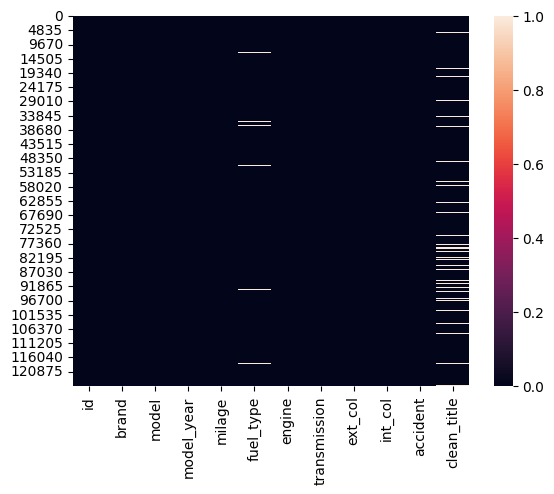

In [10]:
sns.heatmap(test_d.isna())

In [11]:
#Before deleting any columns or handling null values lets encode the categorical featurses
object_cols = train_d.select_dtypes(include='object').columns
object_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [12]:
# Define the categorical columns to encode
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
encoder = LabelEncoder()
# Define the encoding function
def encode(data):
    for col in cat_cols:
        data[col] = encoder.fit_transform(data[col])
    return data

In [13]:
encode(train_d)
encode(test_d)
train_d.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,4,36,1077,2021,7388,2,259,23,29,10,1,0,97500


In [14]:
#lets fill the null values 
imputer = SimpleImputer(strategy='most_frequent')
def impute(data):
    data['fuel_type'] = imputer.fit_transform(data[['fuel_type']])
    data['accident'] = imputer.fit_transform(data[['accident']])
    data['clean_title'] = imputer.fit_transform(data[['clean_title']])
    return data

In [15]:
impute(train_d)
impute(test_d)
train_d.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

<Axes: >

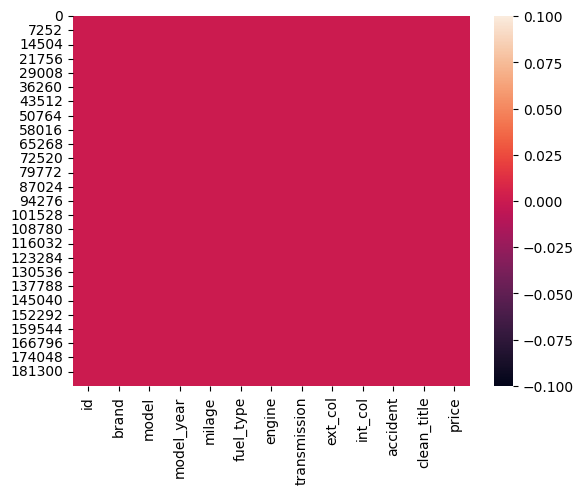

In [16]:
sns.heatmap(train_d.isna())

Now we can see that there are no nulls so now lets see which features we will keep

In [17]:
#after encoding and before dropping any column lets first check for the colleration between the features and the target

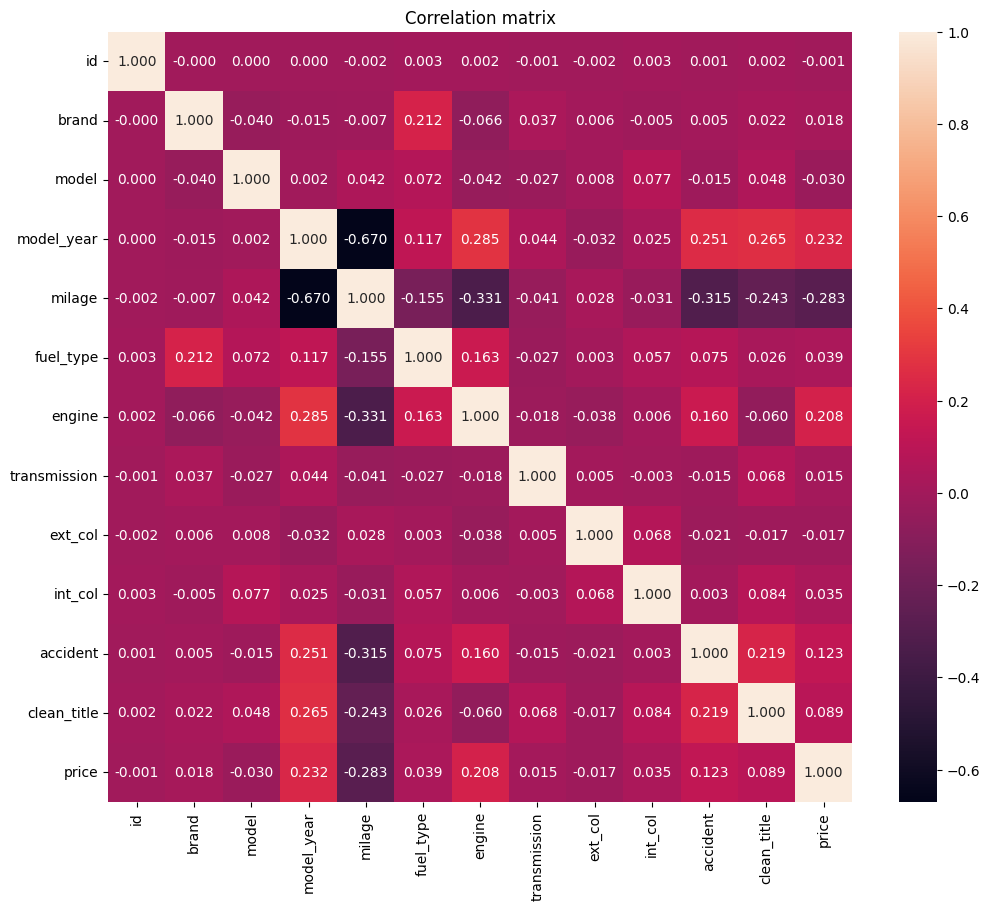

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(train_d.corr(),annot=True,fmt='.3f')
plt.title("Correlation matrix")
plt.show()

So the most features that affect the target which is price column are : accident , engine ,milage , model_year and we can keep clean_title because its near to 0.1

In [19]:
# now we can drop the lowest correlation features with the target
#before dropping column like id lets put it in a new variable because we will need it in submission
test_ids = test_d['id']
def drop_col(data):
    data.drop(columns = ['int_col','ext_col','transmission','fuel_type','model','brand','id'],axis = 1 , inplace = True)
    return data

In [20]:
drop_col(train_d)
drop_col(test_d)
train_d.head()

,model_year,milage,engine,accident,clean_title,price
0,2007,213000,116,1,0,4200
1,2002,143250,366,0,0,4999
2,2002,136731,640,1,0,13900
3,2017,19500,863,1,0,45000
4,2021,7388,259,1,0,97500


In [21]:
test_ids.head()

0    188533
1    188534
2    188535
3    188536
4    188537
Name: id, dtype: int64

## Step 2: EDA
Some important graphs of the most features that affect the target which is the price column

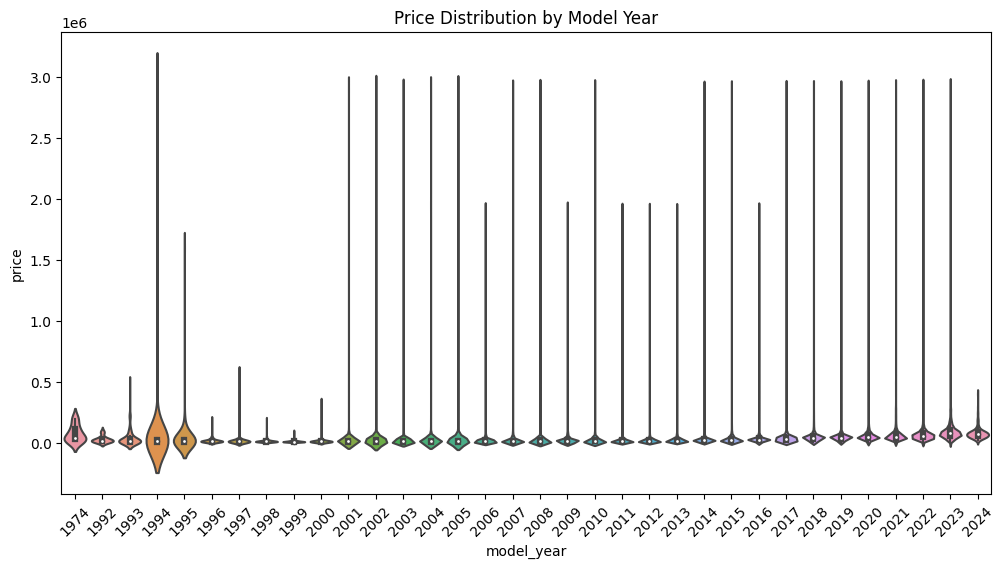

In [22]:
plt.figure(figsize=(12, 6))
plt.title("Price Distribution by Model Year")
sns.violinplot(x='model_year', y='price', data=train_d, scale='width')
plt.xticks(rotation=45)
plt.show()

In [23]:
# plt.figure(figsize=(12, 6))
# plt.title("Price Distribution by Milage")
# sns.violinplot(x='milage', y='price', data=train_d, scale='width')
# plt.xticks(rotation=45)
# plt.show()

In [24]:
# plt.figure(figsize=(12, 6))
# plt.title("Price Distribution by Engine")
# sns.violinplot(x='engine', y='price', data=train_d, scale='width')
# plt.xticks(rotation=45)
# plt.show()

## Modeling and evaluating

Before modeling lets scale the high values features to be easier for the models

In [25]:
scale = MinMaxScaler()
def scaledata(data):
    data['model_year'] = scale.fit_transform(data[['model_year']])
    data['milage'] = scale.fit_transform(data[['milage']])
    data['engine'] = scale.fit_transform(data[['engine']])
    return data

In [26]:
scaledata(train_d)
scaledata(test_d)
train_d.head()

,model_year,milage,engine,accident,clean_title,price
0,0.66,0.525809,0.103943,1,0,4200
1,0.56,0.353544,0.327957,0,0,4999
2,0.56,0.337444,0.573477,1,0,13900
3,0.86,0.047913,0.773297,1,0,45000
4,0.94,0.018000,0.232079,1,0,97500


In [27]:
X = train_d.drop('price',axis = 1)
y= train_d['price']

In [28]:
X.head()

,model_year,milage,engine,accident,clean_title
0,0.66,0.525809,0.103943,1,0
1,0.56,0.353544,0.327957,0,0
2,0.56,0.337444,0.573477,1,0
3,0.86,0.047913,0.773297,1,0
4,0.94,0.018000,0.232079,1,0


In [29]:
y.head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [31]:
RMSE_list={
    'Model name' : [],
    'RMSE' : []
}

In [32]:
LinearReg = LinearRegression()
LinearReg.fit(X_train,y_train)
y_pred_linear = LinearReg.predict(X_test)
# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate root mean squared error
rmse_linear = np.sqrt(mse_linear)
    
RMSE_list['Model name'].append('LinearReg')
RMSE_list['RMSE'].append(rmse_linear)
rmse_linear

70346.58432618955

In [33]:
Ridge = Ridge()
Ridge.fit(X_train,y_train)
y_pred_Ridge = Ridge.predict(X_test)
# Calculate mean squared error
mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)

# Calculate root mean squared error
rmse_Ridge = np.sqrt(mse_Ridge)
    
RMSE_list['Model name'].append('Ridge')
RMSE_list['RMSE'].append(rmse_Ridge)
rmse_Ridge

70346.48251021454

In [34]:
Lasso = Lasso()
Lasso.fit(X_train,y_train)
y_pred_Lasso = Lasso.predict(X_test)
# Calculate mean squared error
mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)

# Calculate root mean squared error
rmse_Lasso = np.sqrt(mse_Lasso)
    
RMSE_list['Model name'].append('Lasso')
RMSE_list['RMSE'].append(rmse_Lasso)
rmse_Lasso

70346.61071886834

In [35]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train,y_train)
y_pred_DecisionTree = DecisionTree.predict(X_test)
# Calculate mean squared error
mse_DecisionTree = mean_squared_error(y_test, y_pred_DecisionTree)

# Calculate root mean squared error
rmse_DecisionTree = np.sqrt(mse_DecisionTree)
    
RMSE_list['Model name'].append('DecisionTree')
RMSE_list['RMSE'].append(rmse_DecisionTree)
rmse_DecisionTree

98785.66346280533

In [36]:
RandomForest = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
RandomForest.fit(X_train,y_train)
y_pred_RandomForest = RandomForest.predict(X_test)
# Calculate mean squared error
mse_RandomForest = mean_squared_error(y_test, y_pred_RandomForest)

# Calculate root mean squared error
rmse_RandomForest = np.sqrt(mse_RandomForest)
    
RMSE_list['Model name'].append('RandomForest')
RMSE_list['RMSE'].append(rmse_RandomForest)
rmse_RandomForest

74549.97574863305

In [37]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

KNN = KNeighborsRegressor()
grid_search = GridSearchCV(KNN, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best model
best_knn = grid_search.best_estimator_

y_pred_KNN = best_knn.predict(X_test)
# Calculate mean squared error
mse_KNN = mean_squared_error(y_test, y_pred_KNN)

# Calculate root mean squared error
rmse_KNN = np.sqrt(mse_KNN)
    
RMSE_list['Model name'].append('KNN')
RMSE_list['RMSE'].append(rmse_KNN)
rmse_KNN

71404.49467992177

In [38]:
XGB = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
XGB.fit(X_train,y_train)
y_pred_XGB = XGB.predict(X_test)
# Calculate mean squared error
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

# Calculate root mean squared error
rmse_XGB = np.sqrt(mse_XGB)
    
RMSE_list['Model name'].append('XGB')
RMSE_list['RMSE'].append(rmse_XGB)
rmse_XGB

68600.40563214044

In [39]:
differenceDF = pd.DataFrame(RMSE_list)
# Sort the DataFrame by RMSE for better visibility
differenceDF = differenceDF.sort_values(by='RMSE', ascending=True)

# Display the DataFrame in a clear tabular format
differenceDF

,Model name,RMSE
6,XGB,68600.405632
1,Ridge,70346.482510
0,LinearReg,70346.584326
2,Lasso,70346.610719
5,KNN,71404.494680
4,RandomForest,74549.975749
3,DecisionTree,98785.663463


In [40]:
Final_Model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
Final_Model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# make a variable to store the values of the predctions
FinalPredcs = Final_Model.predict(test_d)
#test on the other data set that we want it to be the output for the submission

In [42]:
Final_Result = pd.DataFrame({'id':test_ids,'price':FinalPredcs})
Final_Result

,id,price
0,188533,16171.602539
1,188534,78852.976562
2,188535,54950.511719
3,188536,23631.017578
4,188537,31262.638672
...,...,...
125685,314218,27334.767578
125686,314219,51335.070312
125687,314220,26050.763672
125688,314221,17941.078125


In [43]:
Final_Result.to_csv("submission.csv",index = False)